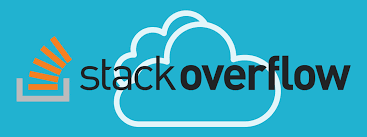

This is Exploratory data analysis of Stack overflow developers survey conducted by Stackoverflow every year.
Stack Overflow is a large online community  for programmers to ask and answer programming related questions.
In this survey they asked developers some questions regarding developers ranging from their age to their favourite tech stack .

The dataset can be found at https://insights.stackoverflow.com/survey.

# EDA of StackOverFlow Developer Survey 

## Importing Libraries

In [264]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [265]:
plt.rcParams['figure.figsize'] = (7, 7)

## Importing Dataset

In [266]:
df=pd.read_csv('survey_results_public.csv') #main dataset
df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no longer am",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or software engineering",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [267]:
pd.set_option('max_colwidth',None)
schema=pd.read_csv('survey_results_schema.csv')    #description of columns of main dataset
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(schema)


,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
7,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
8,Country,Where do you live?
9,CurrencyDesc,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."


In [268]:
df.JobFactors.str.split(';').explode().value_counts()

Languages, frameworks, and other technologies I’d be working with         25334
Office environment or company culture                                     21981
Flex time or a flexible schedule                                          21656
Opportunities for professional development                                20421
Remote work options                                                       16411
How widely used or impactful my work output would be                      10277
Industry that I’d be working in                                            7574
Family friendliness                                                        5986
Financial performance or funding status of the company or organization     5892
Specific department or team I’d be working on                              5805
Diversity of the company or organization                                   3387
Name: JobFactors, dtype: int64

## Basic Information 

In [269]:
print(f"This is a huge dataset and the number of rows and columns in this dataset are {df.shape} and the size of dataset is {df.size}")

This is a huge dataset and the number of rows and columns in this dataset are (64461, 61) and the size of dataset is 3932121


In [270]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [272]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


The minimum age here is 1 whereas the highest age is 279 which is not possible  also the maximum work hours per week is 475 which is not possible as there are only 168 hours in a week and we will fix it by dropping age less than 10 years and age more than 100 years, also we will drop all the rows having more than 140 workweek hours.

## Checking for null values

In [273]:
df.isnull().sum()

Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64

All the columns with atleast one null value

In [274]:
df.columns[df.isnull().any()].to_list()

['MainBranch',
 'Hobbyist',
 'Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWCollabToolsWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'NEWSOSites',
 'NEWStuck',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'Sexuality',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WelcomeChange',
 'WorkWeekHrs',
 '

## Data Cleaning 

In [275]:
df.drop(df[df.Age<10].index,inplace=True)
df.drop(df[df.Age>100].index,inplace=True)


In [276]:
df.drop(df[df.WorkWeekHrs>140].index,inplace=True)

Since the dataset contains a lot of columns we will choose only those columns which are relevant for our analysis

In [277]:
required_columns = [
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'Ethnicity',
    'UndergradMajor',
    'PlatformDesireNextYear',
    'PlatformWorkedWith',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'OpSys',
    'NEWOvertime',
    'NEWEdImpt',
    'ConvertedComp',
    'MainBranch',
    'OrgSize'
]

In [278]:
df=df[required_columns]

We will Use some dataset specifically for India just to compare it with other parameters

In [279]:
dfin=df[df.Country=='India']
dfin

,Country,Age,Gender,EdLevel,Hobbyist,Age1stCode,YearsCode,Ethnicity,UndergradMajor,PlatformDesireNextYear,...,DevType,WorkWeekHrs,JobSat,JobFactors,OpSys,NEWOvertime,NEWEdImpt,ConvertedComp,MainBranch,OrgSize
6,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Yes,18,6,NaN,"Computer science, computer engineering, or software engineering",NaN,...,"Developer, back-end;Developer, front-end;Developer, QA or test;DevOps specialist",NaN,Very satisfied,NaN,Windows,Sometimes: 1-2 days per month but less than weekly,Very important,NaN,I am a developer by profession,20 to 99 employees
21,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Yes,18,10,NaN,"Computer science, computer engineering, or software engineering",NaN,...,"Developer, full-stack;Engineer, data",50.0,Slightly dissatisfied,NaN,Windows,Often: 1-2 days per week or more,Very important,NaN,I am a developer by profession,500 to 999 employees
57,India,NaN,NaN,NaN,Yes,22,NaN,South Asian,Web development or web design,NaN,...,"Developer, back-end",NaN,Very satisfied,Family friendliness,Windows,Often: 1-2 days per week or more,Very important,NaN,I am a developer by profession,NaN
62,India,21.0,Man,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Yes,17,4,South Asian,NaN,AWS;Docker;Heroku;iOS,...,"Designer;Developer, back-end;Developer, front-end;Developer, mobile;Developer, QA or test",NaN,NaN,Flex time or a flexible schedule;How widely used or impactful my work output would be;Office environment or company culture,Windows,NaN,NaN,NaN,I am a student who is learning to code,NaN
147,India,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Yes,31,5,East Asian,"Computer science, computer engineering, or software engineering",Google Cloud Platform;Linux,...,"Developer, back-end;Developer, QA or test;DevOps specialist;Engineer, data;System administrator",70.0,Very satisfied,"Languages, frameworks, and other technologies I’d be working with;Financial performance or funding status of the company or organization;Office environment or company culture",Linux-based,Sometimes: 1-2 days per month but less than weekly,Critically important,293196.0,I am a developer by profession,500 to 999 employees
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64391,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Yes,18,5,NaN,"Computer science, computer engineering, or software engineering",Linux;Windows,...,"Developer, full-stack;Developer, QA or test",NaN,NaN,NaN,Linux-based,NaN,NaN,NaN,NaN,NaN
64398,India,NaN,NaN,"Associate degree (A.A., A.S., etc.)",Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64439,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Yes,NaN,NaN,NaN,I never declared a major,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64442,India,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration and Visualisation

Where are the Developers from?

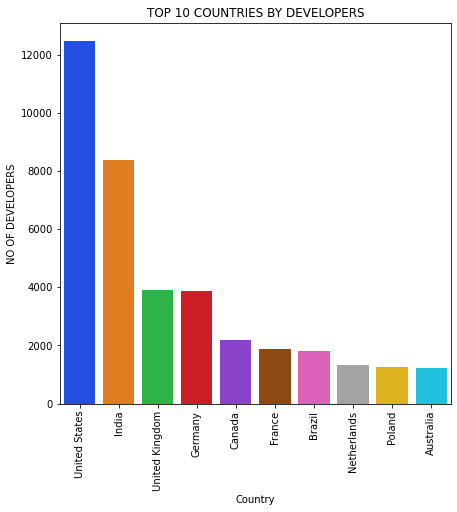

In [280]:
sns.countplot(x=df['Country'],data=df,order=pd.value_counts(df.Country).iloc[:10].index,palette='bright')
plt.xticks(rotation=90);
plt.ylabel("NO OF DEVELOPERS")
plt.title('TOP 10 COUNTRIES BY DEVELOPERS');


We can see that most of the developers are from USA and India 

### What is Your  Gender?

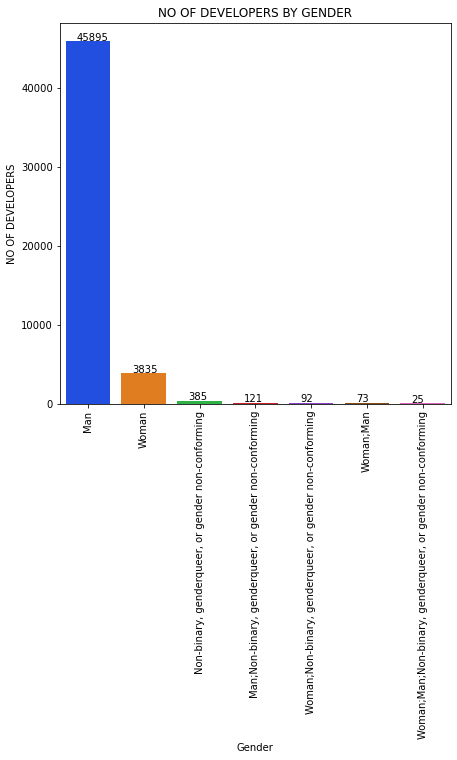

In [281]:
ax=sns.countplot(x=df['Gender'],data=df,order=pd.value_counts(df.Gender).index,palette='bright')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+100))
plt.ylabel('NO OF DEVELOPERS')
plt.title('NO OF DEVELOPERS BY GENDER');


As expected Most of the developers are Men , but I am very hopeful that this will increase in future as more and more women are taking STEM related fields

### Do you code as a hobby?

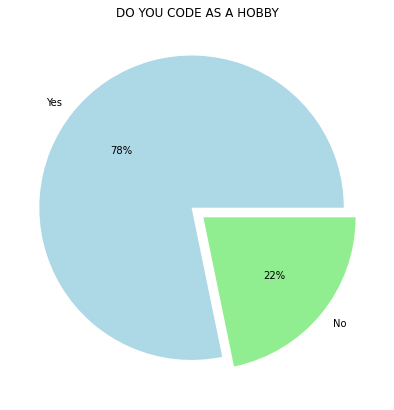

In [282]:
plt.pie(df['Hobbyist'].value_counts(),autopct='%1.0f%%',explode=(0.05,0.05),labels=df['Hobbyist'].value_counts().index,colors=('lightblue','lightgreen'))
plt.title('DO YOU CODE AS A HOBBY');

Deriving a data from main dataset which contains data of only man and woman

In [283]:
dfmw=df[(df.Gender=='Man')|(df.Gender=='Woman')]

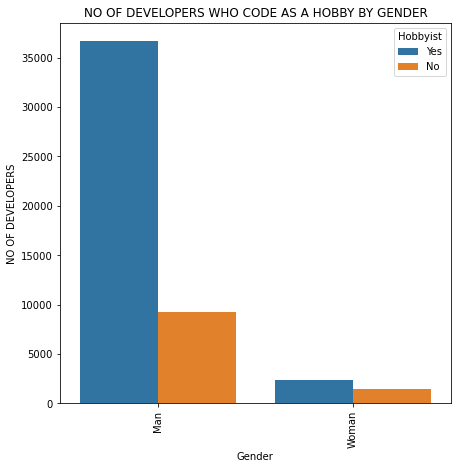

In [284]:
sns.countplot(x=dfmw.Gender,data=dfmw,hue=dfmw.Hobbyist)
plt.xticks(rotation=90)
plt.ylabel('NO OF DEVELOPERS')
plt.title('NO OF DEVELOPERS WHO CODE AS A HOBBY BY GENDER');



WE HAVE ONLY CONSIDERED MALE AND FEMALE GENDER HERE SINCE THE DATA FOR OTHER GENDERS IS VERY LOW

Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?

In [285]:
df.JobFactors.str.split(';').explode().value_counts()

Languages, frameworks, and other technologies I’d be working with         25265
Office environment or company culture                                     21920
Flex time or a flexible schedule                                          21585
Opportunities for professional development                                20354
Remote work options                                                       16363
How widely used or impactful my work output would be                      10255
Industry that I’d be working in                                            7559
Family friendliness                                                        5961
Financial performance or funding status of the company or organization     5879
Specific department or team I’d be working on                              5797
Diversity of the company or organization                                   3379
Name: JobFactors, dtype: int64

WHAT TYPE OF DEVELOPER ARE YOU`?

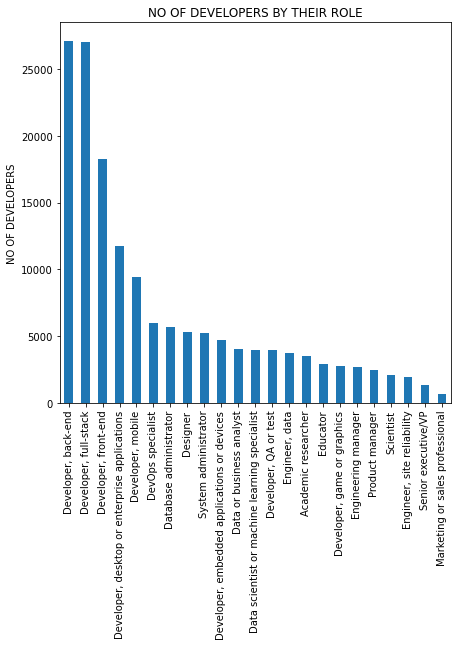

In [286]:
df.DevType.str.split(';').explode().value_counts().plot(kind='bar')
plt.ylabel('NO OF DEVELOPERS')
plt.title('NO OF DEVELOPERS BY THEIR ROLE');


WHAT PROGRAMMING LANGUAGE DOES DEVELOPERS USE?

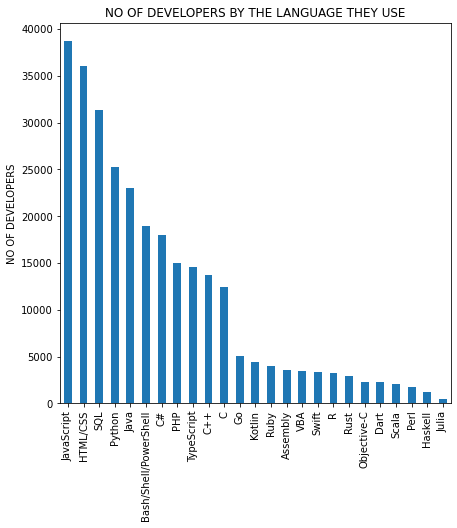

In [287]:
df.LanguageWorkedWith.str.split(';').explode().value_counts().plot(kind='bar')
plt.ylabel('NO OF DEVELOPERS')
plt.title('NO OF DEVELOPERS BY THE LANGUAGE THEY USE');


THIS IS PROBABLY THE MOST IMPORTANT GRAPH WHICH SHOWS US THAT JAVASCRIPT AND HTML/CSS ARE THE MOST FAMOUS PROGRAMMING LANGUAGE AND BOTH OF THEM ARE USED FOR WEBDEVELOPMENT , WHERE AS SQL A QUERY LANGUAGE AND PYTHON A GENERAL PURPOSE LANGUAGE IS ALSO AMONNG THE MOST WIDELY USED LANGUAGE(MAYBE IT IS THE MOST FAMOUS LANGUAGE AMONG PEOPLE WHO CODE AS A HOBBY , WE WILL CHECK THIS NEXT)

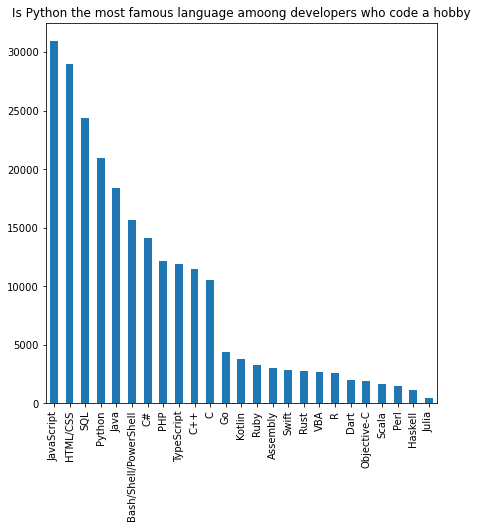

In [288]:
dfhobby=df[df.Hobbyist=='Yes']
dfhobby.LanguageWorkedWith.str.split(';').explode().value_counts().plot(kind='bar')
plt.title('Is Python the most famous language amoong developers who code a hobby');

The answer to the question is No , the graph of most widely used language is almost same

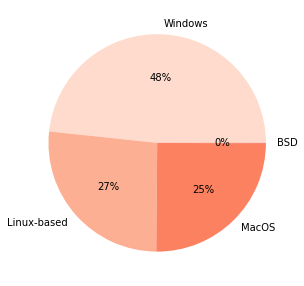

In [289]:
plt.figure(figsize=(5,5))
plt.pie(df['OpSys'].value_counts(),autopct='%1.0f%%',labels=df['OpSys'].value_counts().index,colors=sns.color_palette('Reds'));


As we can see almost half of the developers use Windows operation system and there is tie between linux and macos for second position

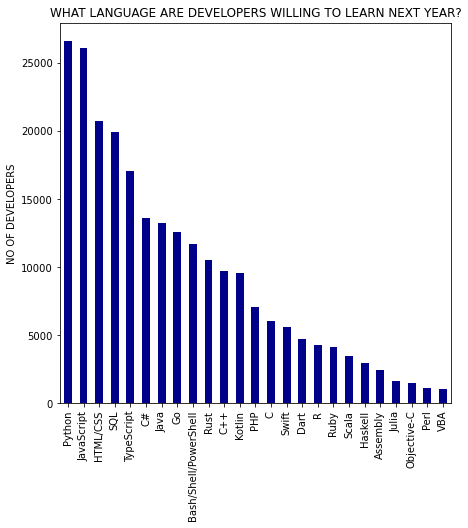

In [290]:
df.LanguageDesireNextYear.str.split(';').explode().value_counts().plot(kind='bar',color='darkblue')
plt.ylabel('NO OF DEVELOPERS')
plt.title('WHAT LANGUAGE ARE DEVELOPERS WILLING TO LEARN NEXT YEAR?');


Importand conclusion from this graph is that so many developers what to learn Python next year , maybe because it is the perfect language to automate various tasks and it it also very easy to learn .
I find an interesting article on why python is becoming so populary.
Link to the article: https://www.pulumi.com/why-is-python-so-popular/

In [291]:
dfstu=df[df.MainBranch=='I am a student who is learning to code']

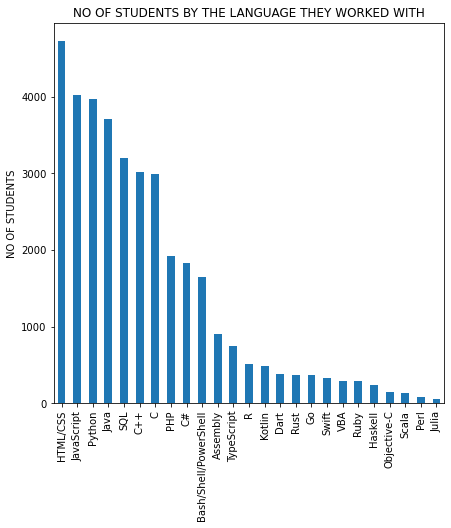

In [292]:
dfstu.LanguageWorkedWith.str.split(';').explode().value_counts().plot(kind='bar')
plt.ylabel('NO OF STUDENTS')
plt.title('NO OF STUDENTS BY THE LANGUAGE THEY WORKED WITH');

There isn't much difference between the popularity of Languages among professsionals and students.

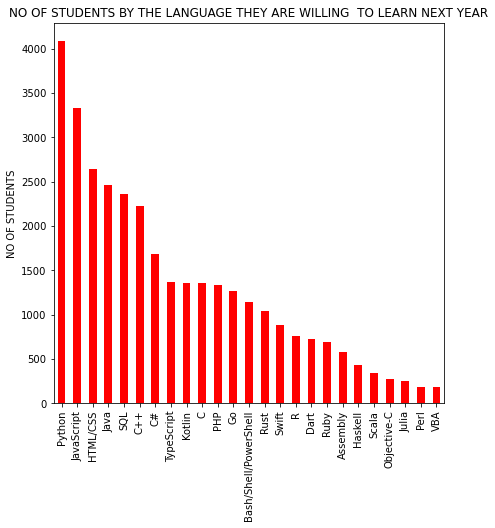

In [293]:
dfstu.LanguageDesireNextYear.str.split(';').explode().value_counts().plot(kind='bar',color='r')
plt.ylabel('NO OF STUDENTS')
plt.title('NO OF STUDENTS BY THE LANGUAGE THEY ARE WILLING  TO LEARN NEXT YEAR');

Same as professionals , students are also willing to learn python next year.

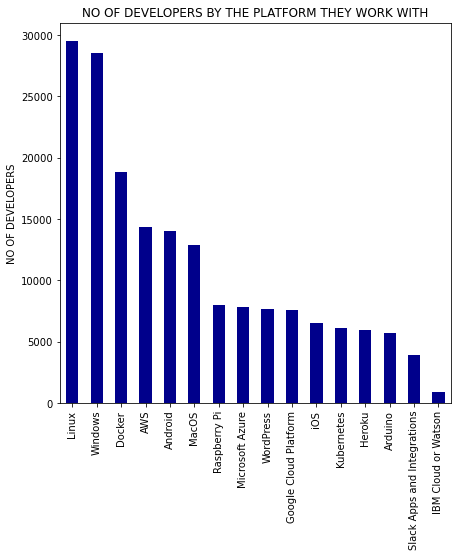

In [294]:
df.PlatformWorkedWith.str.split(';').explode().value_counts().plot(kind='bar',color='darkblue');
plt.ylabel('NO OF DEVELOPERS')
plt.title('NO OF DEVELOPERS BY THE PLATFORM THEY WORK WITH');


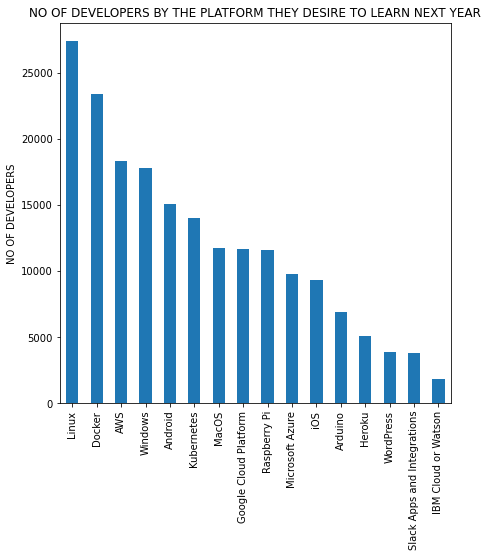

In [295]:
df.PlatformDesireNextYear.str.split(';').explode().value_counts().plot(kind='bar')
plt.ylabel('NO OF DEVELOPERS')
plt.title('NO OF DEVELOPERS BY THE PLATFORM THEY DESIRE TO LEARN NEXT YEAR');


## WHAT ABOUT INDIA?

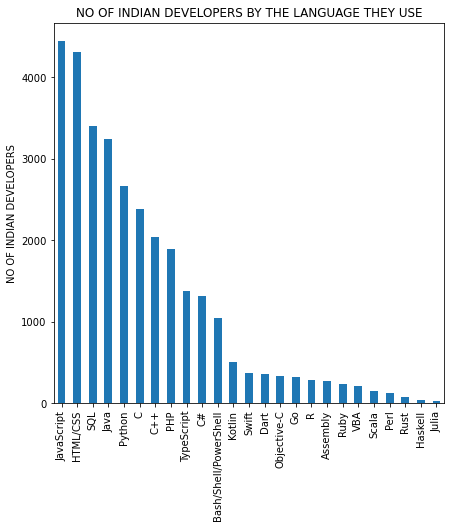

In [296]:
dfin.LanguageWorkedWith.str.split(';').explode().value_counts().plot(kind='bar')
plt.ylabel('NO OF INDIAN DEVELOPERS')
plt.title('NO OF INDIAN DEVELOPERS BY THE LANGUAGE THEY USE');


An interesting take from this graph is that JAVA is more popular than Python in India

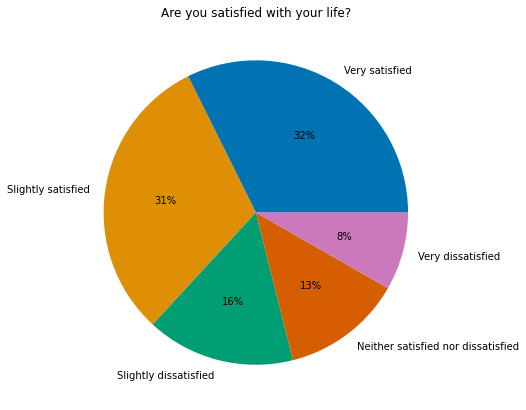

In [297]:
color = sns.color_palette('colorblind')
plt.pie(df.JobSat.value_counts(),autopct='%1.0f%%',labels=df.JobSat.value_counts().index,colors=color)
plt.title("Are you satisfied with your life?");

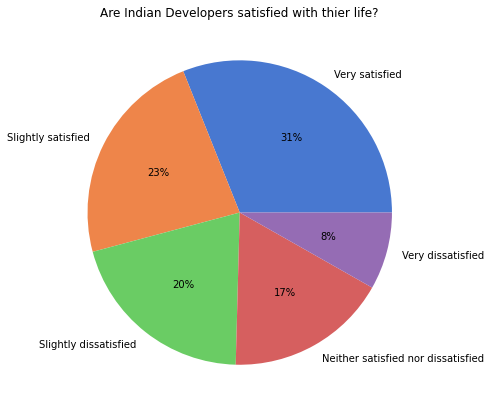

In [298]:
color = sns.color_palette('muted')
plt.pie(dfin.JobSat.value_counts(),autopct='%1.0f%%',labels=df.JobSat.value_counts().index,colors=color)
plt.title("Are Indian Developers satisfied with thier life?");

63% of Developers are satisfied with their life whereas 24% are dissatisfied , In India only  54% are satisfied

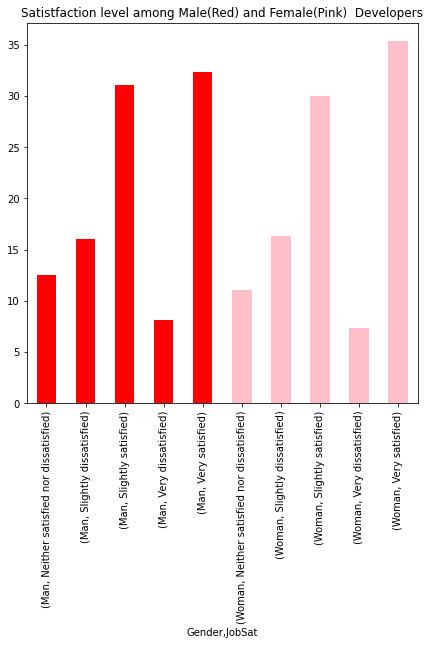

In [326]:
df2=dfmw.groupby(['Gender','JobSat'])['JobSat'].count()
df3=df2/df2.groupby(level=0).sum()*100
colors=['red','red','red','red','red','pink','pink','pink','pink','pink']
df3.plot(kind='bar',color=colors)
plt.title('Satistfaction level among Male(Red) and Female(Pink)  Developers');

In [300]:
df3

Gender  JobSat                            
Man     Neither satisfied nor dissatisfied    12.519679
        Slightly dissatisfied                 15.996907
        Slightly satisfied                    31.035435
        Very dissatisfied                      8.136548
        Very satisfied                        32.311431
Woman   Neither satisfied nor dissatisfied    11.030928
        Slightly dissatisfied                 16.288660
        Slightly satisfied                    29.965636
        Very dissatisfied                      7.353952
        Very satisfied                        35.360825
Name: JobSat, dtype: float64

We can see that Female Developers(65) are more satisfied from their job in comparison to male developers(63) the difference is not much.

In [301]:
df4=df.groupby(['OrgSize','JobSat'])['JobSat'].count()
df5=df4/df4.groupby(level=0).sum()*100
df5

OrgSize                                             JobSat                            
1,000 to 4,999 employees                            Neither satisfied nor dissatisfied    11.939682
                                                    Slightly dissatisfied                 16.133030
                                                    Slightly satisfied                    32.431316
                                                    Very dissatisfied                      7.952902
                                                    Very satisfied                        31.543070
10 to 19 employees                                  Neither satisfied nor dissatisfied    12.356532
                                                    Slightly dissatisfied                 15.995116
                                                    Slightly satisfied                    30.647131
                                                    Very dissatisfied                      9.279609
             

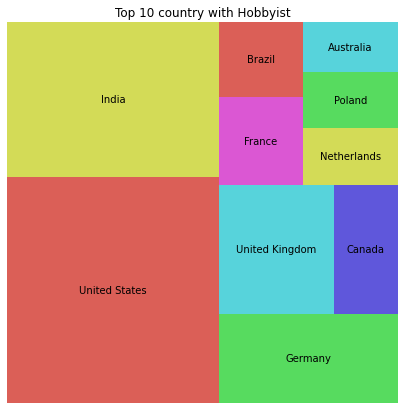

In [302]:
data=df[df.Hobbyist=='Yes']
data=data.groupby(data.Country)['Hobbyist'].count().nlargest(10)
colors = sns.color_palette('hls')
squarify.plot(sizes=data.values,label=data.index,color=colors)
plt.title('Top 10 country with Hobbyist')
plt.axis('off');

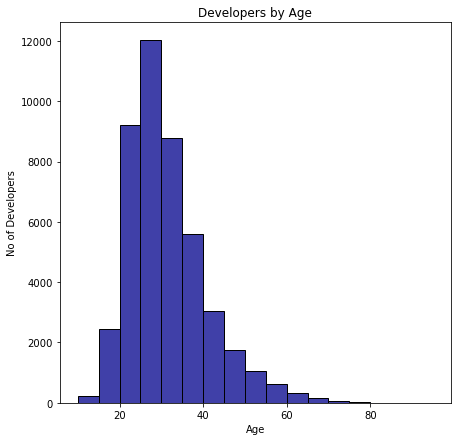

In [303]:
sns.histplot(x=df.Age,data=df,color='darkblue',bins=range(10,100,5))
plt.title('Developers by Age')
plt.ylabel('No of Developers');

Most of the developers are in the age bracket of 20-40

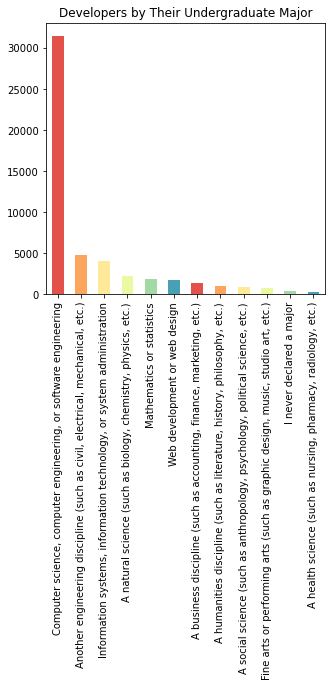

In [304]:
color=sns.color_palette("Spectral")
plt.figure(figsize=(5,5))
df.UndergradMajor.value_counts().plot(kind='bar',color=color)
plt.title('Developers by Their Undergraduate Major');


Its a no brainer that almost 80% of Developers are from Engineering background , it is also important to note that even with a humanities background you can enter the field of Computer science as long as you have necessary skills

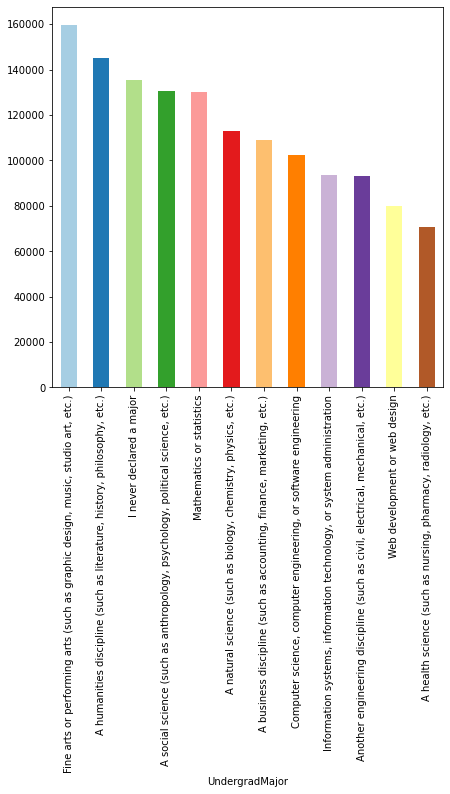

In [305]:
color=sns.color_palette("Paired")
df.groupby(df.UndergradMajor)['ConvertedComp'].mean().sort_values(ascending=False).plot(kind='bar',color=color);

An unexpected conculison from this graph is that People belonging from Arts Background have the highest salary..
This might be due to some fields like graphics designing pays very high.

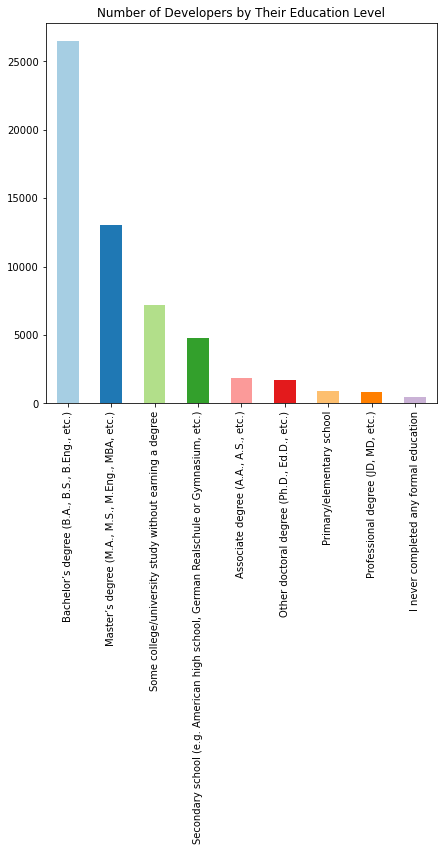

In [306]:
color=sns.color_palette("Paired")
df.EdLevel.value_counts().plot(kind='bar',color=color)
plt.title('Number of Developers by Their Education Level');


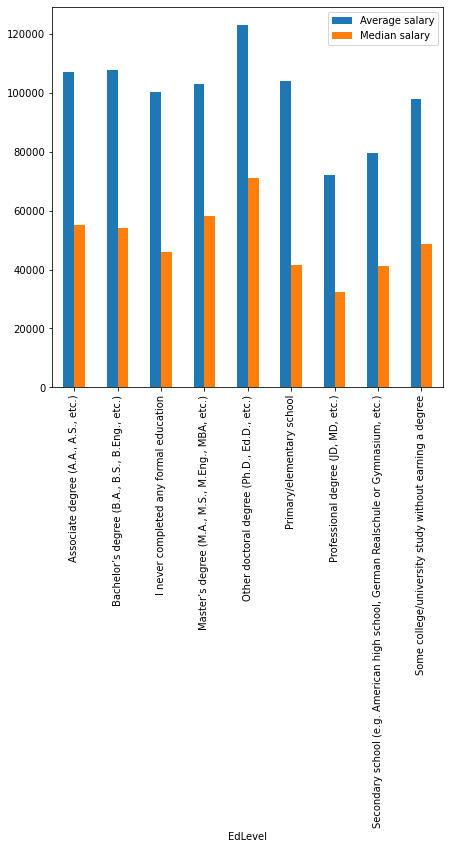

In [307]:
df.groupby(df.EdLevel).agg({'ConvertedComp':['mean','median']}).plot(kind='bar')
plt.legend(["Average salary","Median salary"]);


On an average developers with Doctoral degree gets the highest salary of around $120k

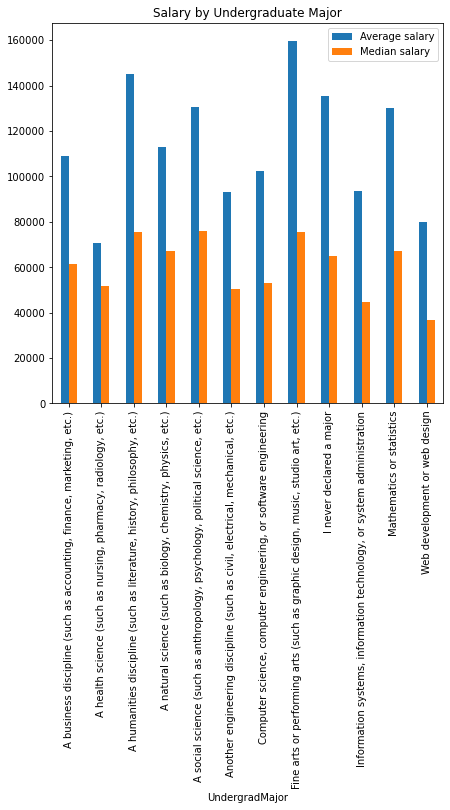

In [308]:
df.groupby(df.UndergradMajor).agg({'ConvertedComp':['mean','median']}).plot(kind='bar')
plt.legend(["Average salary","Median salary"])
plt.title('Salary by Undergraduate Major');

In [309]:
df.groupby(df.Country)['ConvertedComp'].mean().sort_values(ascending=False).head(10)

Country
Lao People's Democratic Republic    231275.250000
United States                       208852.110293
Ireland                             183000.740351
Nomadic                             180995.230769
Afghanistan                         148290.125000
Australia                           146165.814767
Norway                              143561.604651
Switzerland                         142001.936288
United Kingdom                      140920.018175
New Zealand                         140843.359606
Name: ConvertedComp, dtype: float64

## Work Hours in a week

In [310]:
display(df.groupby(df.Country)['WorkWeekHrs'].mean().sort_values(ascending=False).head(10))
print('Average work hours per week is ',df.WorkWeekHrs.mean())
print('Average work hours per week in India is  ',dfin.WorkWeekHrs.mean())

Country
Kuwait                              58.222222
Grenada                             50.000000
Iraq                                49.071429
Maldives                            47.300000
Afghanistan                         46.500000
United Republic of Tanzania         46.000000
Jordan                              45.806452
Djibouti                            45.000000
Tajikistan                          45.000000
Saint Vincent and the Grenadines    45.000000
Name: WorkWeekHrs, dtype: float64

Average work hours per week is  40.02439496203716
Average work hours per week in India is   40.09972643620989


This table tells us that Kuwait has the highest work hours in a week , assuming a person works 5 days in a week in Kuwait a person works more than 11 hours a day which is way above world average of 40 hours per week

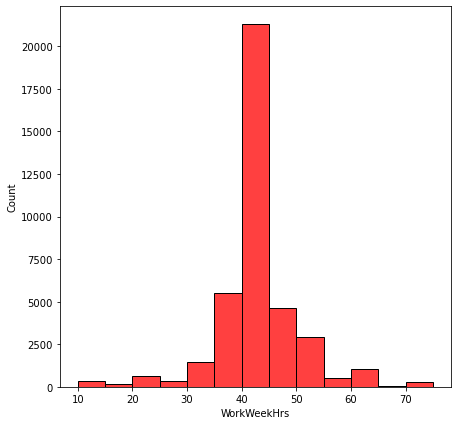

In [311]:
sns.histplot(df.WorkWeekHrs,bins=range(10,80,5),color='r');

Most of the people work around 40-50 hours per week

In [312]:
dfmw.groupby(df.Gender).agg({'WorkWeekHrs':'mean','ConvertedComp':'mean'})

,WorkWeekHrs,ConvertedComp
Gender,,
Man,40.131107,103744.521171
Woman,38.894265,98414.345967


This data shows us that the average work week hours and Salary of both man and woman are very close.

Here Ends our EDA.

## Conclusion
* Most of the developers are in the age range of 20-40
* On an average a developer works around **40 hours a week** assuming 5 days work , a developer works around 8 hours daily( Same in India)
* Salary of a Developer does not depend on the Degree(CS degree does not gaurantee very high pay) and even with non technical degree one can get high pay assuming they have good skills still most people prefer BTech degree to become a developer
* More than **60% developers** are satisfied with their life which is higher than most other professions , where as only 53% Indians are satisfied with thier life.
* Contrary to common belief both man and woman gets almost same salary 
* **Python** is the language which most of the developers are willing to learn next year where as **Javascript** is the most used programming language among developers
* Office Environment , Flexible Time and Remote Opportunities are the most important thing a developer cosiders while choosing a job
* **Windows** operating system is the most used operating system by developers
* Average salary of Developer is highest in **United States of America** which around **200,000** Per Annum.
* Female developers(65) are more satisfied with their job in comparison to male developers(63).